In [2]:
# Day-17 Assignment 
# Creted by Nikhil Sharma
#Date : 18-10-2020

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_boston
import seaborn as sns

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


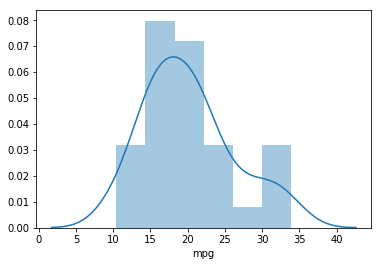

In [3]:
mt_cars = pd.read_csv(r'C:\Official\Work\letsupgrade\Session16\Assignment\mtcars.csv')
mt_cars.head()

mt=mt_cars.drop(columns='model')
outliers =[]
def detect_outliers(data):
    threshold=3
    std=np.std(data)
    mean=np.mean(data)
    
    for elem in data:
        z_score = (elem-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(int(elem))
    return outliers
# print (mt.head())
# print(type(mt))
# print(mt.dtypes)

sns.distplot(mt['mpg'])
# detect_outliers
# outlier_pts =detect_outliers(mt)
# print(outlier_pts)

In [4]:
print(mt.isnull().sum())
print(mt.dtypes)

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object


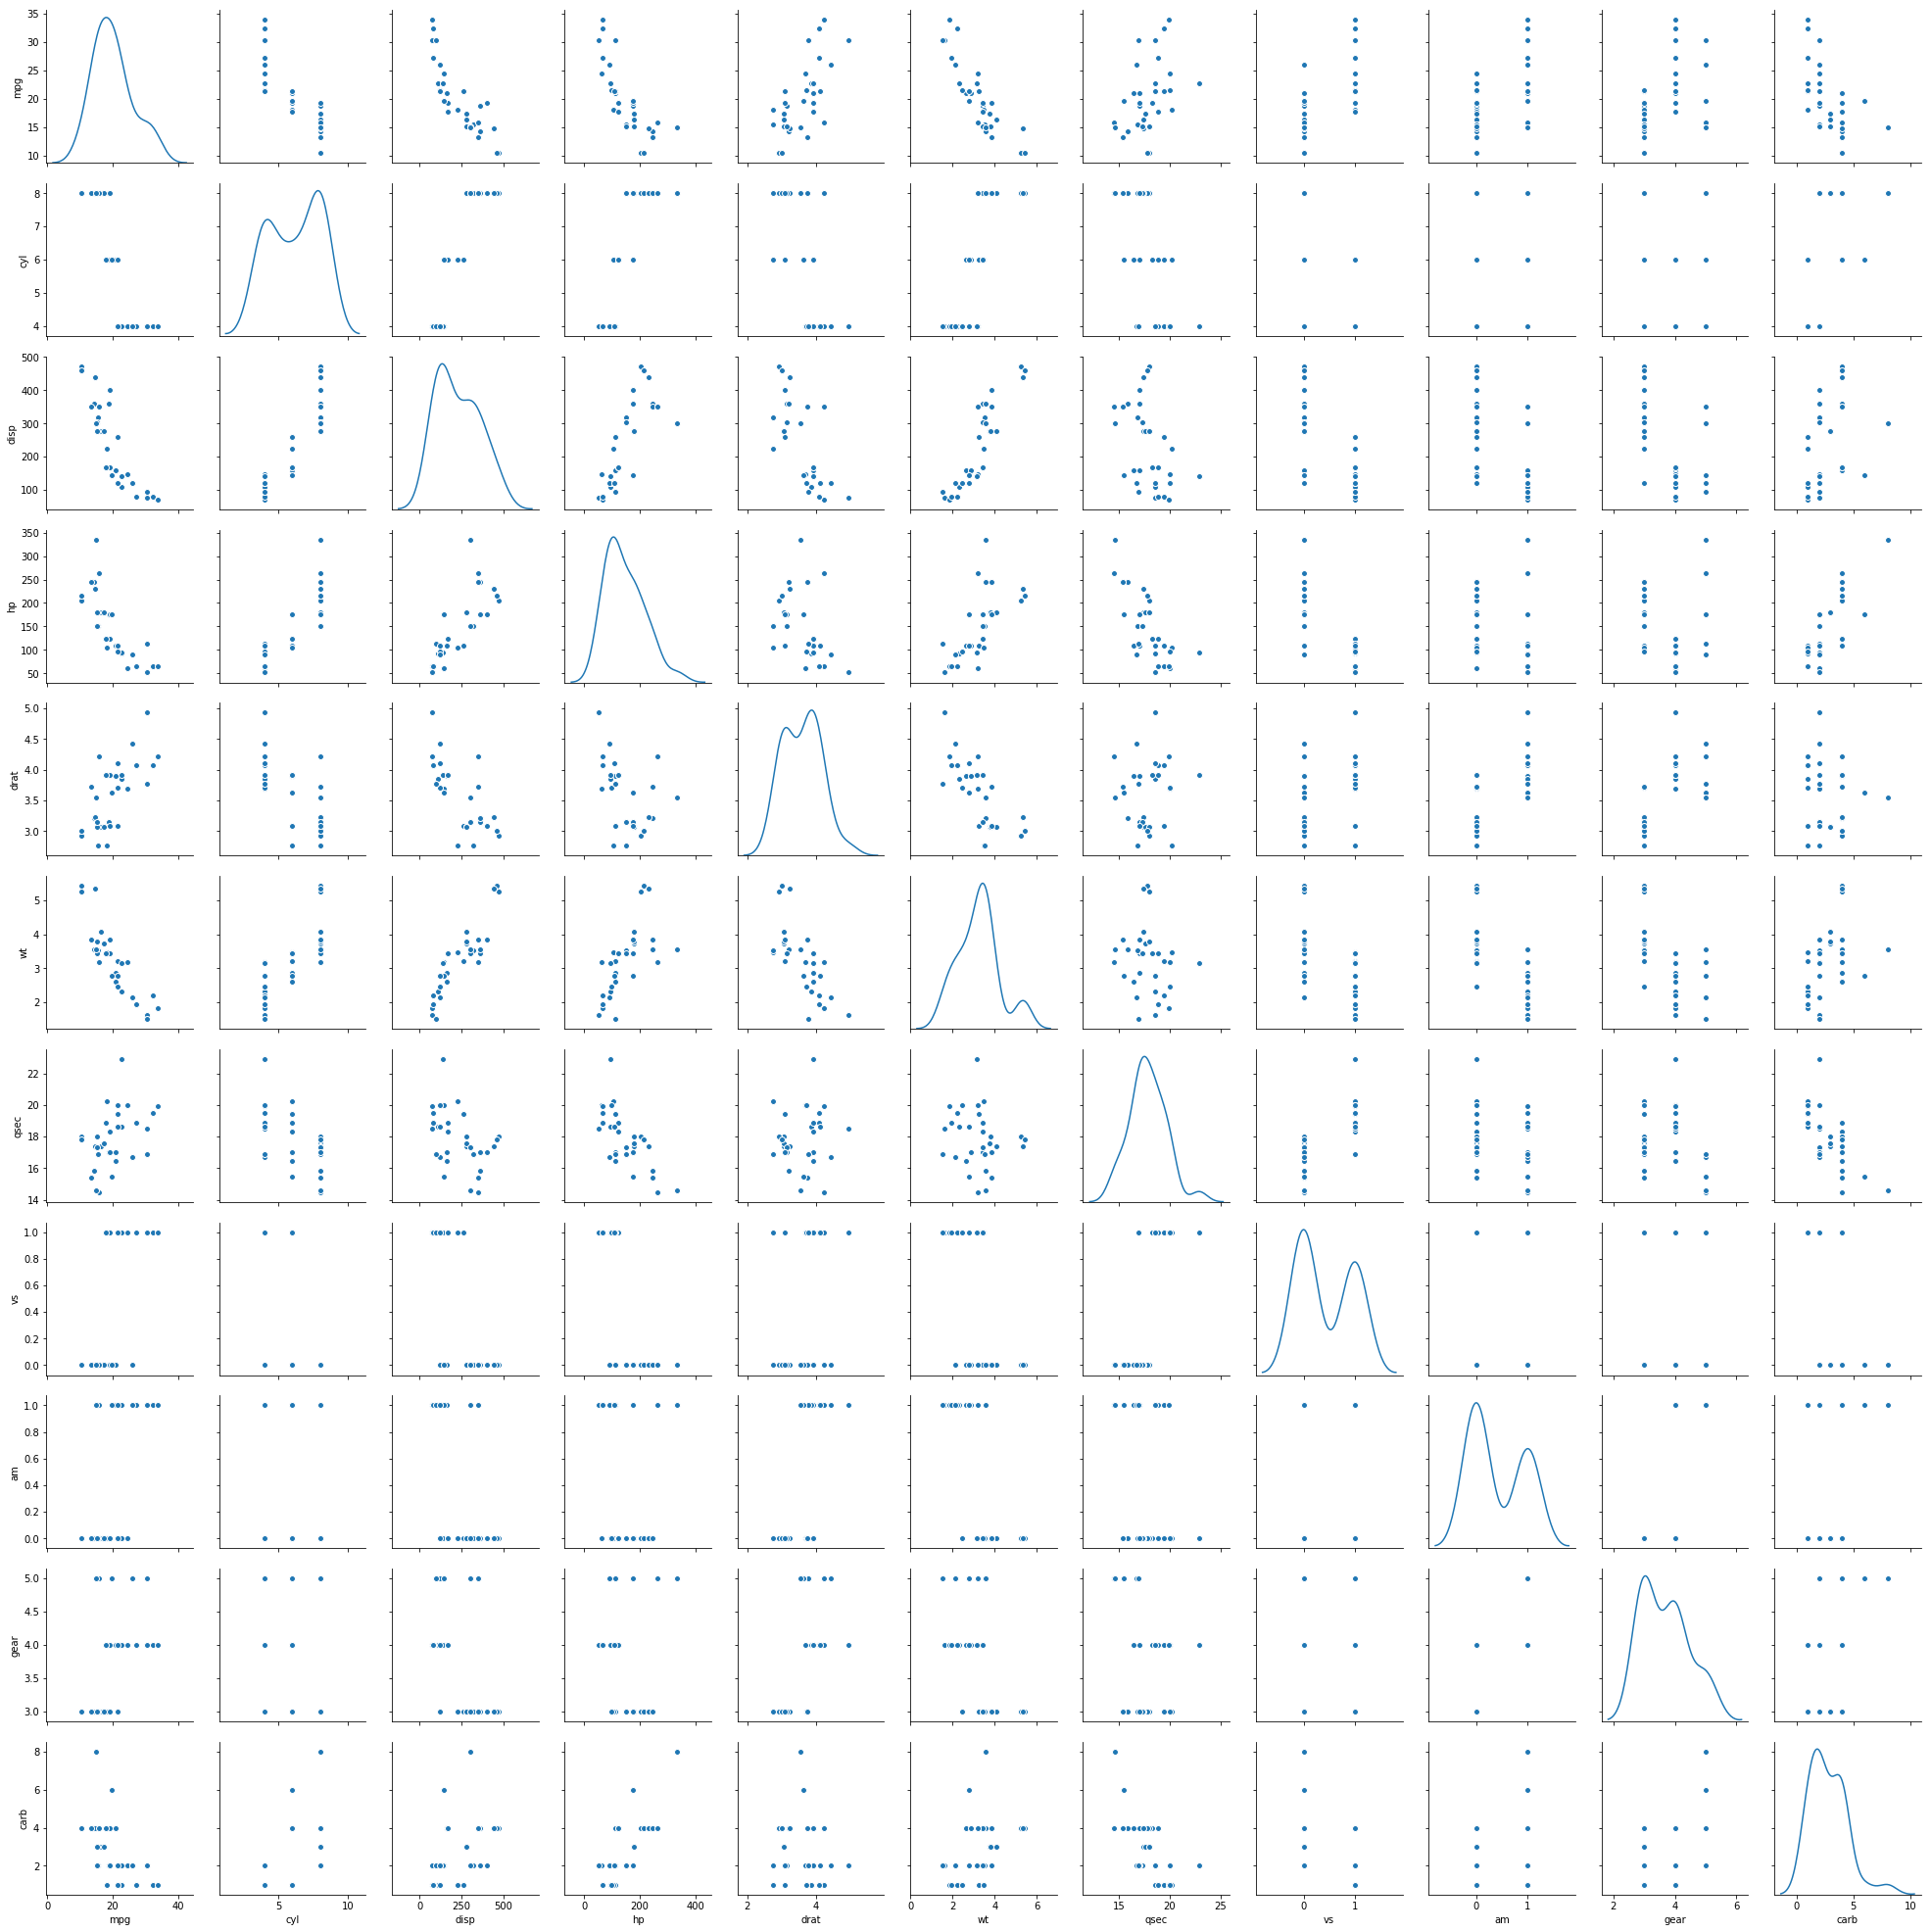

In [5]:
sns.pairplot(mt,diag_kind='kde')

In [6]:
mt.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [7]:
#Based on Mean and Standard Dviation
upper_boundary = mt.mean() + 3*mt.std()
lower_boundary = mt.mean() - 3*mt.std()



print(lower_boundary)
print()
print(upper_boundary)



mpg       2.009781
cyl       0.829735
disp   -141.094206
hp      -59.001105
drat      1.992526
wt        0.281878
qsec     12.487920
vs       -1.074548
am       -1.090723
gear      1.474088
carb     -2.033100
dtype: float64

mpg      38.171469
cyl      11.545265
disp    602.537956
hp      352.376105
drat      5.200599
wt        6.152622
qsec     23.209580
vs        1.949548
am        1.903223
gear      5.900912
carb      7.658100
dtype: float64


In [8]:
#Based on IQR , NOrmal Outlier
IQR = mt.quantile(0.75) - mt.quantile(0.25)
print('IQR',IQR)

lower_bridge_iqr = mt.quantile(0.25) - 1.5 * (IQR)
print('Lower Bridge')
print(lower_bridge_iqr)



upper_bridge_iqr = mt.quantile(0.75) + 1.5 * (IQR)
print('Upper Bridge')
print(upper_bridge_iqr)

IQR mpg       7.37500
cyl       4.00000
disp    205.17500
hp       83.50000
drat      0.84000
wt        1.02875
qsec      2.00750
vs        1.00000
am        1.00000
gear      1.00000
carb      2.00000
dtype: float64
Lower Bridge
mpg       4.362500
cyl      -2.000000
disp   -186.937500
hp      -28.750000
drat      1.820000
wt        1.038125
qsec     13.881250
vs       -1.500000
am       -1.500000
gear      1.500000
carb     -1.000000
dtype: float64
Upper Bridge
mpg      33.862500
cyl      14.000000
disp    633.762500
hp      305.250000
drat      5.180000
wt        5.153125
qsec     21.911250
vs        2.500000
am        2.500000
gear      5.500000
carb      7.000000
dtype: float64


In [9]:
#Based on IQR , Extreme Outlier
IQR = mt.quantile(0.75) - mt.quantile(0.25)
print('IQR',IQR)

lower_bridge_iqr = mt.quantile(0.25) - 3 * (IQR)
print('Lower Bridge')
print(lower_bridge_iqr)



upper_bridge_iqr = mt.quantile(0.75) + 3 * (IQR)
print('Upper Bridge')
print(upper_bridge_iqr)

IQR mpg       7.37500
cyl       4.00000
disp    205.17500
hp       83.50000
drat      0.84000
wt        1.02875
qsec      2.00750
vs        1.00000
am        1.00000
gear      1.00000
carb      2.00000
dtype: float64
Lower Bridge
mpg      -6.700
cyl      -8.000
disp   -494.700
hp     -154.000
drat      0.560
wt       -0.505
qsec     10.870
vs       -3.000
am       -3.000
gear      0.000
carb     -4.000
dtype: float64
Upper Bridge
mpg      44.92500
cyl      20.00000
disp    941.52500
hp      430.50000
drat      6.44000
wt        6.69625
qsec     24.92250
vs        4.00000
am        4.00000
gear      7.00000
carb     10.00000
dtype: float64


In [10]:
from scipy import stats
mt_cars = pd.read_csv(r'C:\Official\Work\letsupgrade\Session16\Assignment\mtcars.csv')
mt_cars.head()
mt=mt_cars.drop(columns='model')
z=np.abs(stats.zscore(mt))
print(z)

print(np.where(z > 3))

z_price=mt[(z < 3).all(axis=1)]



[[1.53299135e-01 1.06667720e-01 5.79750316e-01 5.43654869e-01
  5.76594481e-01 6.20166581e-01 7.89600577e-01 8.81917104e-01
  1.20894105e+00 4.30331483e-01 7.46967077e-01]
 [1.53299135e-01 1.06667720e-01 5.79750316e-01 5.43654869e-01
  5.76594481e-01 3.55382189e-01 4.71201785e-01 8.81917104e-01
  1.20894105e+00 4.30331483e-01 7.46967077e-01]
 [4.56736599e-01 1.24445674e+00 1.00602601e+00 7.95569902e-01
  4.81584062e-01 9.31677630e-01 4.32823359e-01 1.13389342e+00
  1.20894105e+00 4.30331483e-01 1.14010764e+00]
 [2.20729683e-01 1.06667720e-01 2.23615417e-01 5.43654869e-01
  9.81576392e-01 2.33633287e-03 9.04735855e-01 1.13389342e+00
  8.27170192e-01 9.46729262e-01 1.14010764e+00]
 [2.34426513e-01 1.03112130e+00 1.05977159e+00 4.19549669e-01
  8.48561806e-01 2.31296954e-01 4.71201785e-01 8.81917104e-01
  8.27170192e-01 9.46729262e-01 5.11082737e-01]
 [3.35572334e-01 1.06667720e-01 4.69056970e-02 6.17747526e-01
  1.58964307e+00 2.52064357e-01 1.34821989e+00 1.13389342e+00
  8.27170192e-01

In [11]:
mt_cars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [12]:
X, y = load_boston(return_X_y=True)
print(X.shape)


(506, 13)


In [13]:
def outlier_z(a):
    threshold=3
    mean_a = np.mean(a)
    std_a = np.std(a)
    z_score = ([y-mean_a]/std_a for elem in a)
    return(np.where(np.abs(z_score)>threshold))

In [14]:
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

In [15]:
#IQR method
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [16]:
#Method1 :
# Standard deviatiomethod


In [17]:
#Using DBSCAN outlier treatment
import random
from sklearn.cluster import DBSCAN
random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(random_data)
list(clusters).count(-1)

114

In [18]:
from sklearn.ensemble import IsolationForest
import numpy as np
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(random_data)
preds

array([-1,  1, -1, ...,  1,  1,  1])

In [19]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
random.seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))


mean=49.950 stdv=4.989


In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.datasets import load_boston

In [28]:
#Load boston house dataset

boston_dataset = load_boston()

#create dataframe with the independant variable
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
#Descrie the value
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [30]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [31]:
#Preparing the diagnostic plot
def diagnostic(df,variable):
    #function takes datafrae
    #Variable of insterest as arguments
    
    #define figure size
    plt.figure(figsize=(16,4))
    
    #histogram
    plt.subplot(1,3,1)
    sns.distplot(df[variable])
    plt.title('Histogram')
    
    
    #Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist='norm',plot=plt)
    plt.ylabel('RM quantiles')

    
    #Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()
    
    
    
    
    
    
    

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


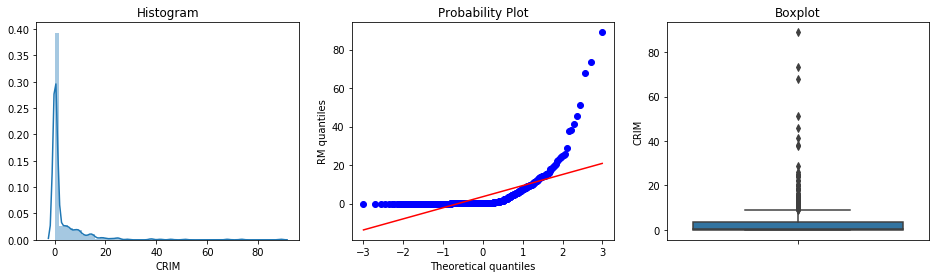

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


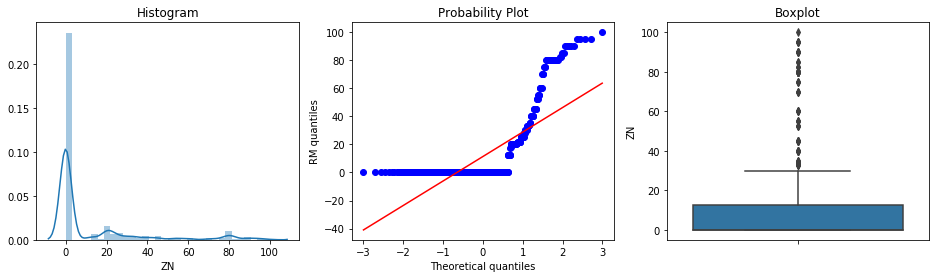

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


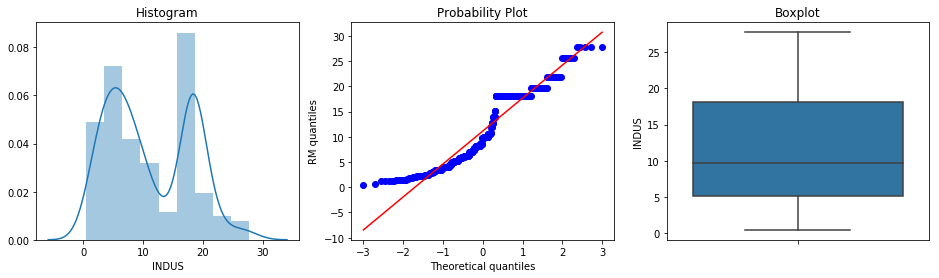

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


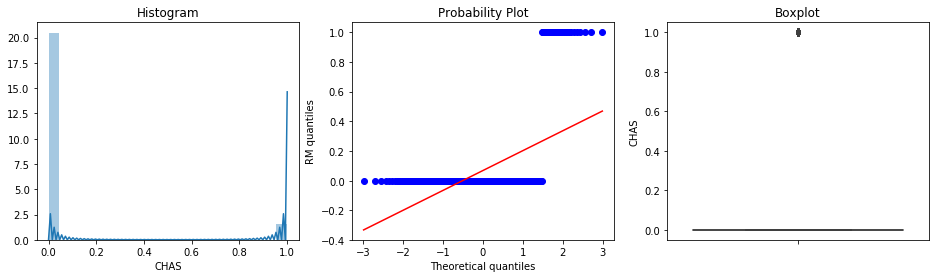

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


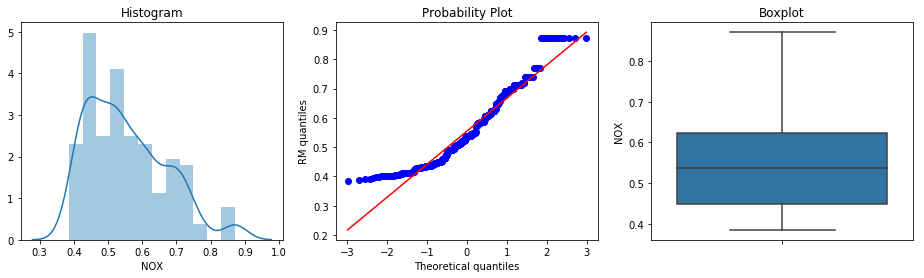

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


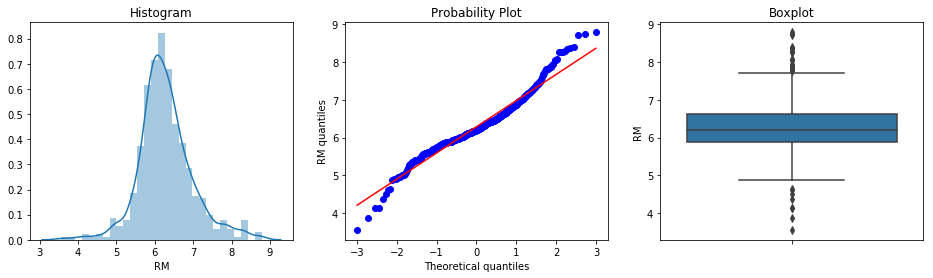

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


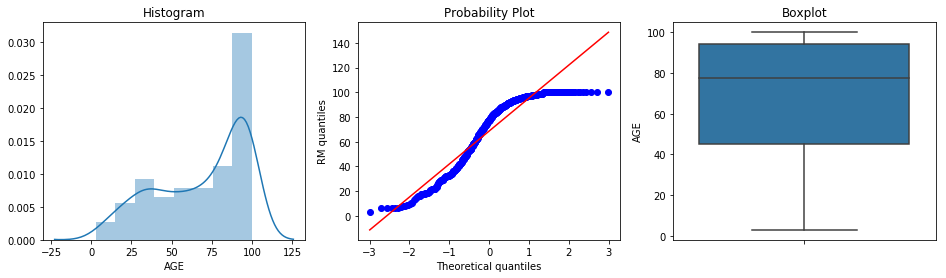

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


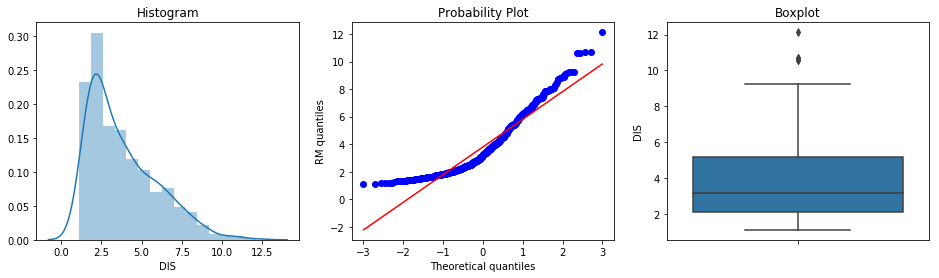

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


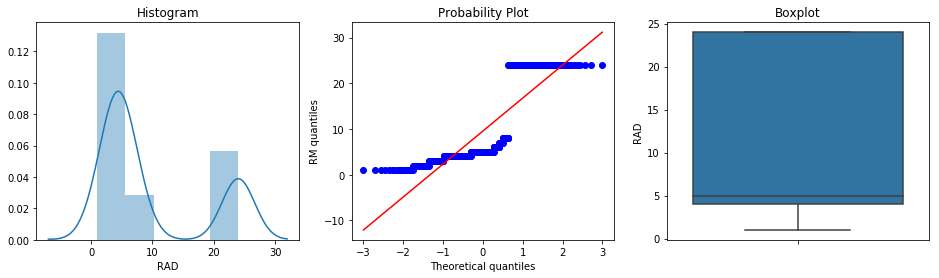

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


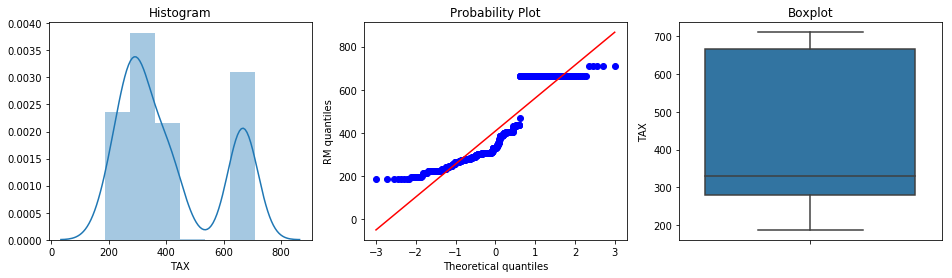

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


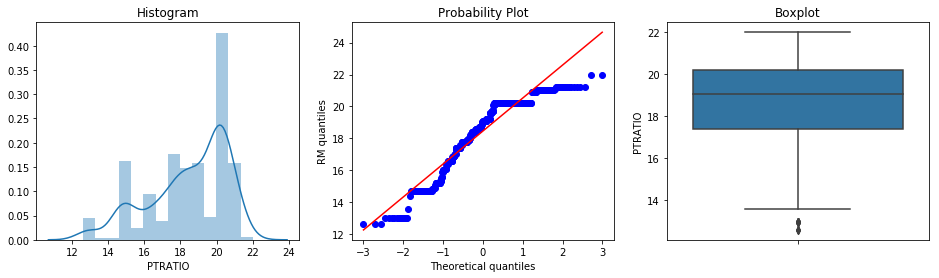

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


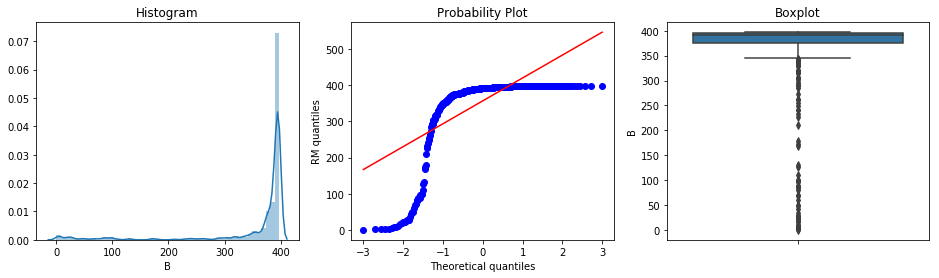

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


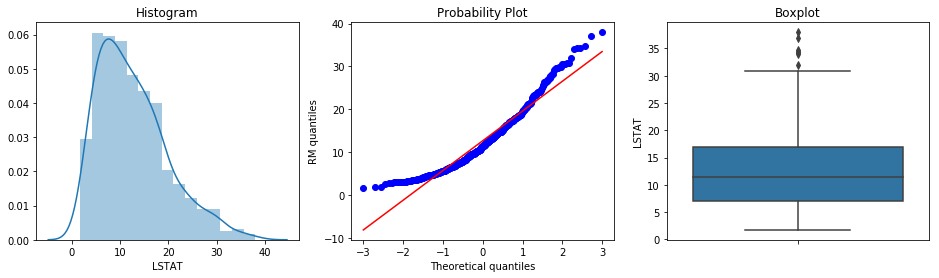

In [34]:
for variable in boston.columns:
    diagnostic(boston,variable)
    
    

In [54]:
# For skewed data computing the boundary
def find_skewed_boundary(df,variable,distance):
    #Caluclate the boundary which sit the outliers
    #For skewed distribution
    #
    #Distance passed as an argument gives us the option to estimate the 1.5 times or 3 times 
#     the IQR caluclations and calculate the boundary

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    
    return lower_boundary,upper_boundary
    


In [55]:
for variable in boston.columns:
    print('Skewed variable target ',variable,find_skewed_boundary(boston,variable,1.5))

Skewed variable target  CRIM (-5.31051125, 9.06963875)
Skewed variable target  ZN (-18.75, 31.25)
Skewed variable target  INDUS (-14.175, 37.465)
Skewed variable target  CHAS (0.0, 0.0)
Skewed variable target  NOX (0.18650000000000005, 0.8865)
Skewed variable target  RM (4.778500000000001, 7.730499999999999)
Skewed variable target  AGE (-28.54999999999999, 167.64999999999998)
Skewed variable target  DIS (-2.5322000000000005, 9.820800000000002)
Skewed variable target  RAD (-26.0, 54.0)
Skewed variable target  TAX (-301.5, 1246.5)
Skewed variable target  PTRATIO (13.199999999999998, 24.4)
Skewed variable target  B (344.10624999999993, 427.49625000000003)
Skewed variable target  LSTAT (-8.057500000000005, 31.962500000000006)


In [57]:
# # Docstring:
# # where(condition, [x, y])

# # Return elements, either from `x` or `y`, depending on `condition`.


# #Flagging the variable
# for variable in boston.columns:
#     outlier_variable=np.where(boston[variable]< find_skewed_boundary(boston,variable,1.5)[0],True,np.where(boston[variable]> find_skewed_boundary(boston,variable,1.5)[1],True,False))




In [60]:
#Flag the outlier in the dataset
RM_lower_boundary,RM_upper_boundary=find_skewed_boundary(boston,'RM',1.5)


Outlier_RM= np.where(boston['RM']>RM_upper_boundary,True,
                    np.where(boston['RM']<RM_lower_boundary,True,False))

In [61]:
#Flag the outlier in the dataset
LSTAT_lower_boundary,LSTAT_upper_boundary=find_skewed_boundary(boston,'LSTAT',1.5)


Outlier_LSTAT= np.where(boston['LSTAT']>LSTAT_upper_boundary,True,
                    np.where(boston['LSTAT']<LSTAT_lower_boundary,True,False))

In [62]:
#Flag the outlier in the dataset
CRIM_lower_boundary,CRIM_upper_boundary=find_skewed_boundary(boston,'CRIM',1.5)


Outlier_CRIM= np.where(boston['CRIM']>CRIM_upper_boundary,True,
                    np.where(boston['CRIM']<CRIM_lower_boundary,True,False))

In [63]:
boston.shape

(506, 13)

In [65]:

boston_trimmed = boston.loc[~(Outlier_RM+Outlier_LSTAT+Outlier_CRIM)]
boston_trimmed.shape

(416, 13)

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


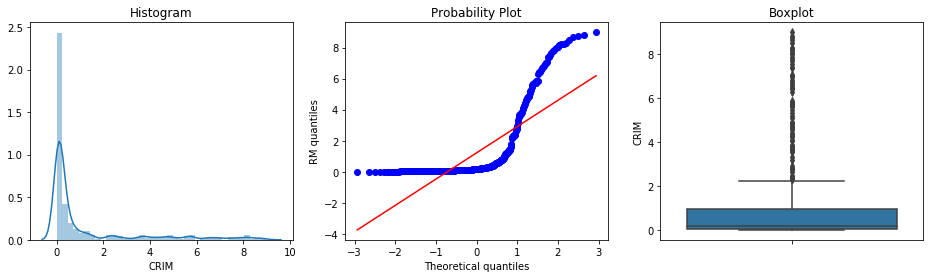

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


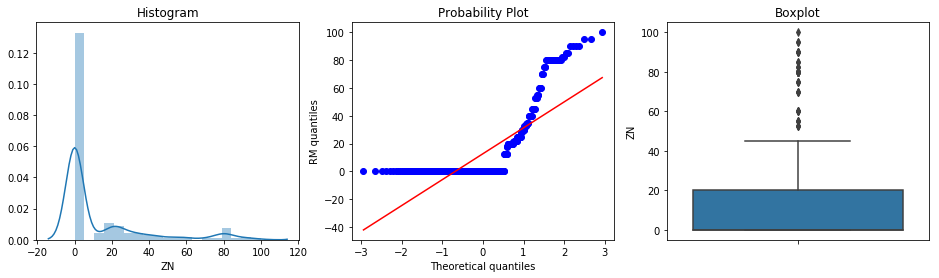

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


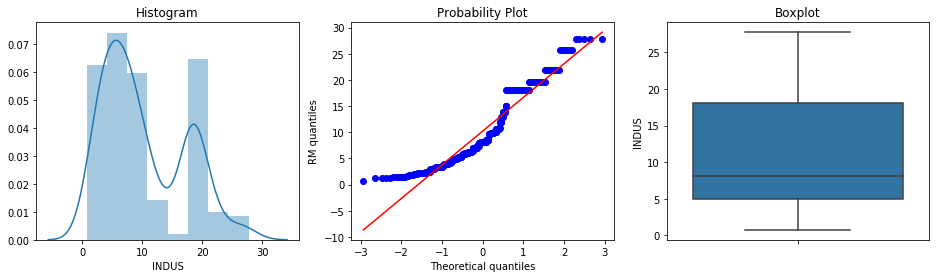

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


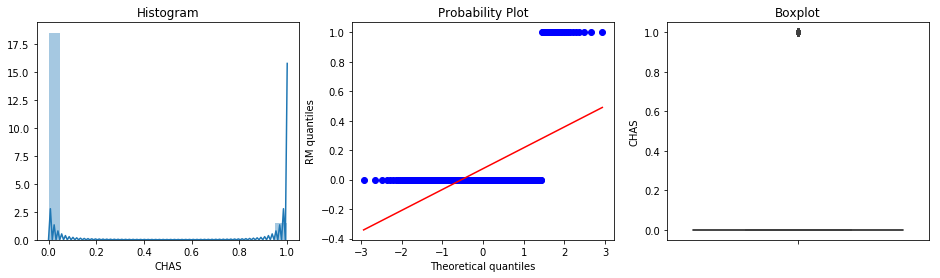

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


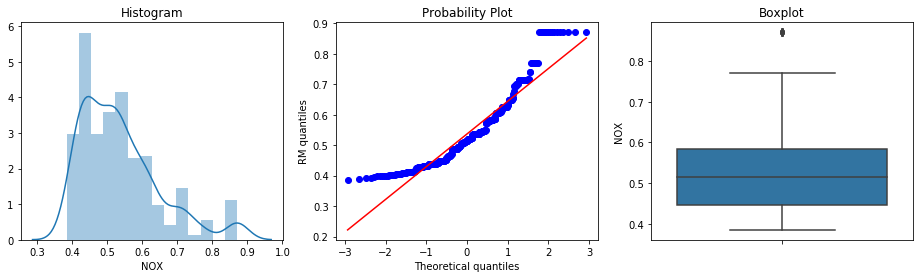

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


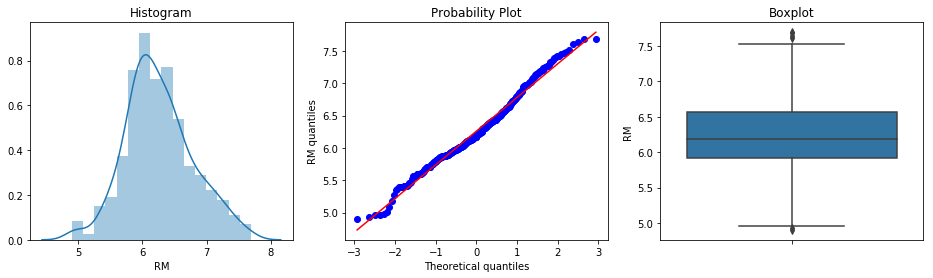

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


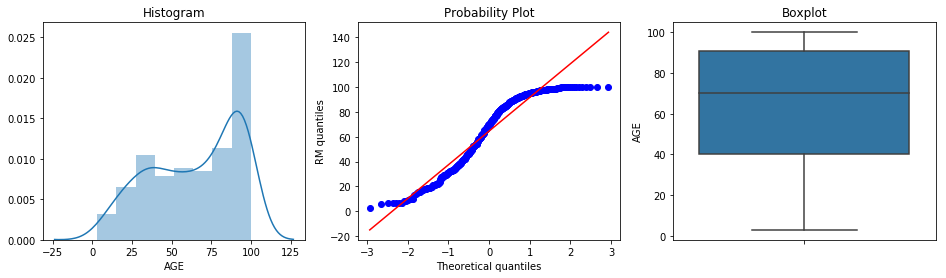

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


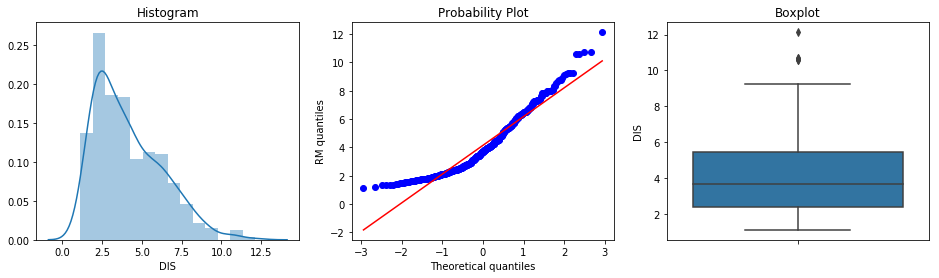

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


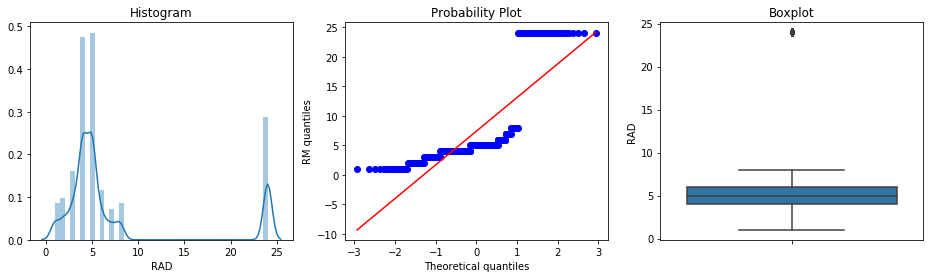

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


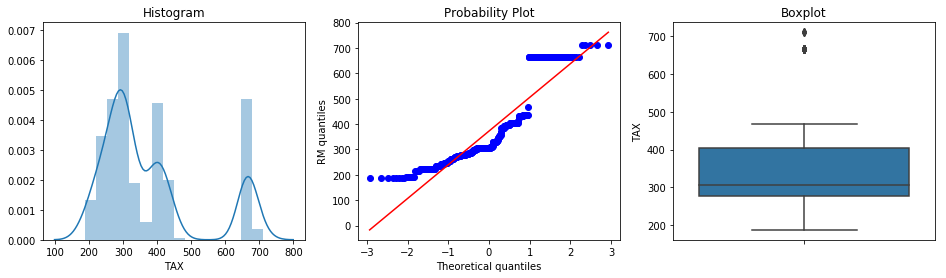

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


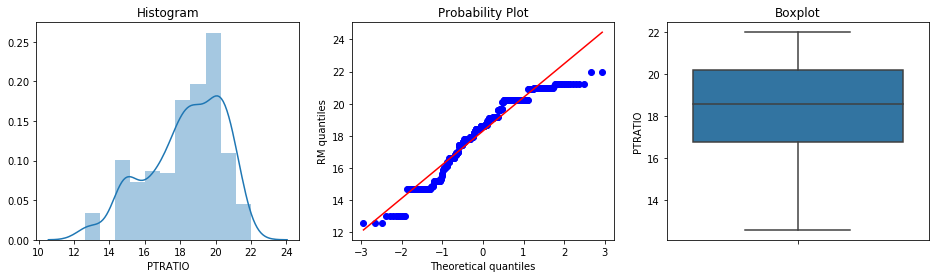

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


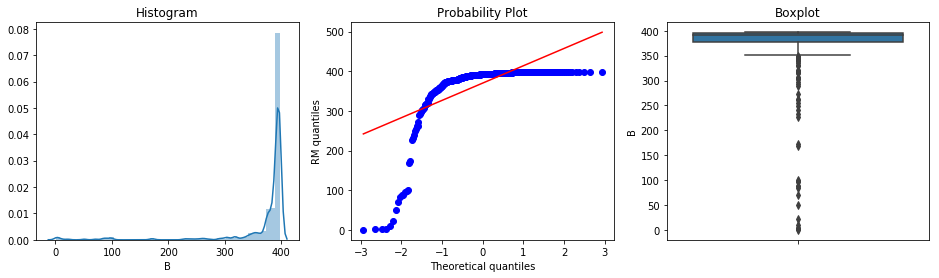

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


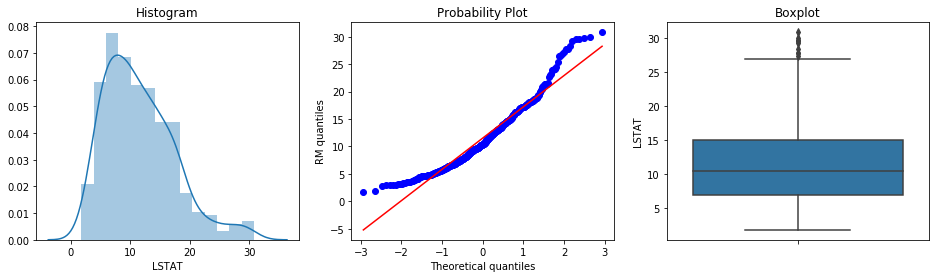

In [66]:
for variable in boston_trimmed.columns:
    diagnostic(boston_trimmed,variable)

In [73]:
#Censoring or Capping of the Outlier 


from feature_engine.outlier_removers import Winsorizer

ModuleNotFoundError: No module named 'feature_engine'

In [70]:
import sys
!{sys.executable} -m pip install feature_engine

  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.3
    Uninstalling numpy-1.14.3:
      Successfully uninstalled numpy-1.14.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\nikhisha\\appdata\\local\\continuum\\anaconda3\\lib\\site-packages\\~umpy\\core\\multiarray.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [74]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables 

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [76]:
# create the capper

windsoriser = Winsorizer(distribution='skewed', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

In [ ]:
boston_t = windsoriser.transform(boston)

In [ ]:
diagnostic(boston, 'RM')

In [ ]:
# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_

In [ ]:
# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_

# If value guassian distribution


In [79]:
#Preparing the diagnostic plot
def diagnostic(df,variable):
    #function takes datafrae
    #Variable of insterest as arguments
    
    #define figure size
    plt.figure(figsize=(16,4))
    
    #histogram
    plt.subplot(1,3,1)
    sns.distplot(df[variable])
    plt.title('Histogram')
    
    
    #Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist='norm',plot=plt)
    plt.ylabel(' Quantiles laels')

    
    #Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()
    

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


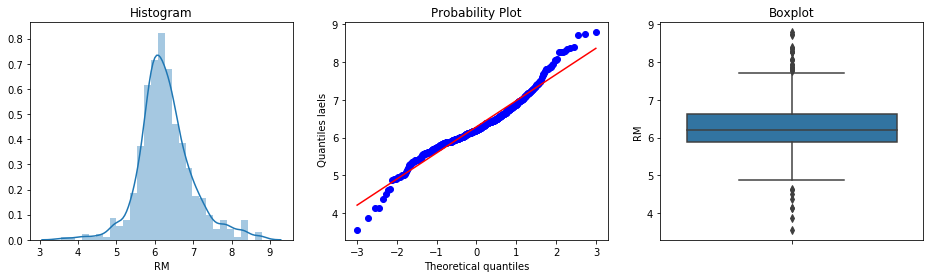

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


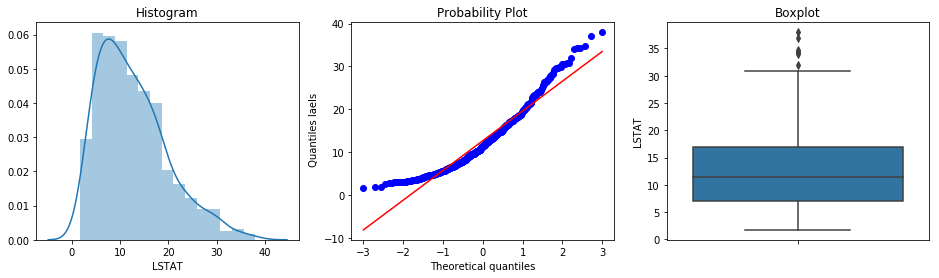

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


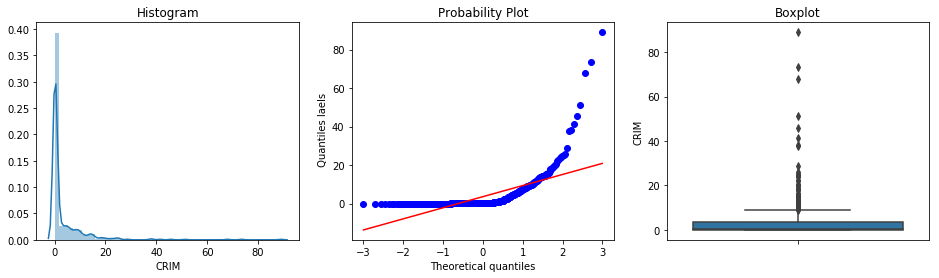

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


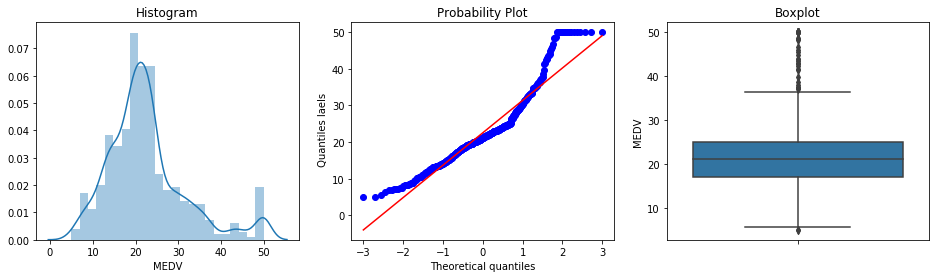

In [80]:
for variable in boston.columns:
    diagnostic(boston,variable)

In [81]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [82]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_normal_boundaries(boston, 'RM', 3)
RM_upper_limit, RM_lower_limit

(8.392485817597757, 4.176782957105816)

In [83]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_normal_boundaries(boston, 'LSTAT', 3)
LSTAT_upper_limit, LSTAT_lower_limit

(34.07624777515244, -8.77012129293899)

In [84]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_normal_boundaries(boston, 'CRIM', 3)
CRIM_upper_limit, CRIM_lower_limit

(29.418158873309714, -22.19111175868521)

In [85]:
# Now let's replace the outliers by the maximum and minimum limit

boston['RM']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

In [86]:
# Now let's replace the outliers by the maximum and minimum limit

boston['LSTAT']= np.where(boston['LSTAT'] > LSTAT_upper_limit, LSTAT_upper_limit,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, LSTAT_lower_limit, boston['LSTAT']))

In [87]:
# Now let's replace the outliers by the maximum and minimum limit

boston['CRIM']= np.where(boston['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
                       np.where(boston['CRIM'] < CRIM_lower_limit, CRIM_lower_limit, boston['CRIM']))

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


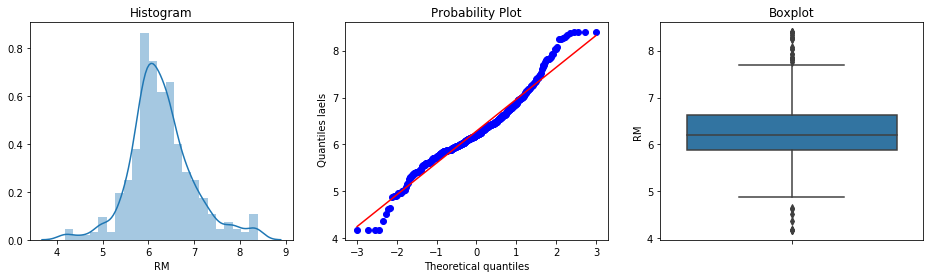

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


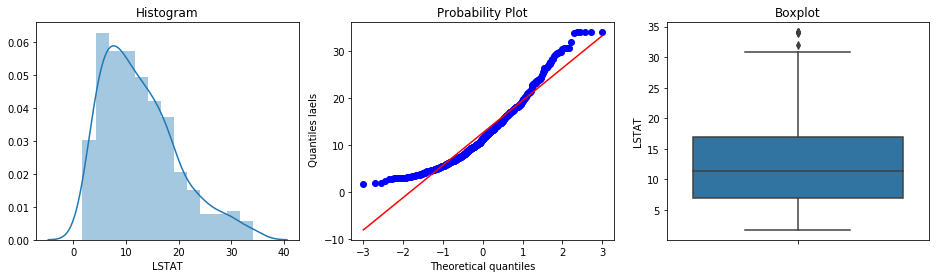

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


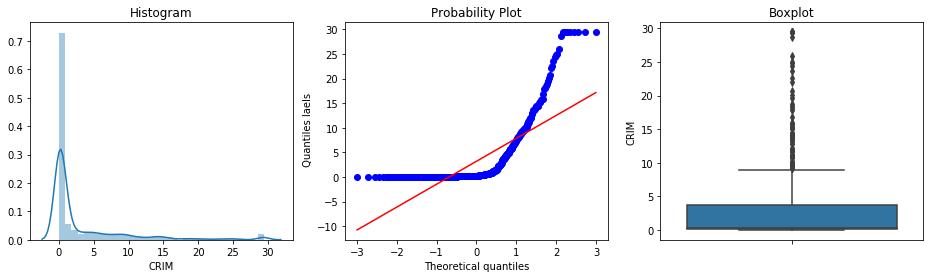

C:\Users\nikhisha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


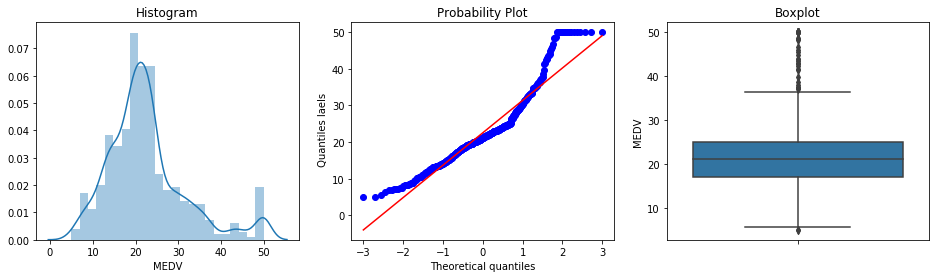

In [89]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

for variable in boston.columns:
    diagnostic(boston,variable)

In [ ]:
# create the capper

windsoriser = Winsorizer(distribution='gaussian', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

In [91]:
# boston_t = windsoriser.transform(boston)

# Using Quantile method outlier treatment


In [92]:
def find_boundaries(df, variable):

    # the boundaries are the quantiles

    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)

    return upper_boundary, lower_boundary

In [93]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM')
RM_upper_limit, RM_lower_limit

(7.5875, 5.314)

In [94]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_boundaries(boston, 'LSTAT')
LSTAT_upper_limit, LSTAT_lower_limit

(26.8075, 3.7075000000000005)

In [95]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_boundaries(boston, 'CRIM')
CRIM_upper_limit, CRIM_lower_limit

(15.78915, 0.027909999999999997)

In [96]:
# Now let's replace the outliers by the maximum and minimum limit

boston['RM']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

In [97]:
# Now let's replace the outliers by the maximum and minimum limit

boston['LSTAT']= np.where(boston['LSTAT'] > LSTAT_upper_limit, LSTAT_upper_limit,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, LSTAT_lower_limit, boston['LSTAT']))

In [98]:
# Now let's replace the outliers by the maximum and minimum limit

boston['CRIM']= np.where(boston['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
                       np.where(boston['CRIM'] < CRIM_lower_limit, CRIM_lower_limit, boston['CRIM']))

# Capping Arbitrary

In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# from feature_engine import missing_data_imputers  as msi
# from feature_engine import outlier_removers as outr

In [101]:
# function to load the titanic dataset

def load_titanic():
    data = pd.read_csv('../titanic.csv')
    data['cabin'] = data['cabin'].astype(str).str[0]
    data['pclass'] = data['pclass'].astype('O')
    data['embarked'].fillna('C', inplace=True)
    return data

In [102]:
data = load_titanic()
data.head()

FileNotFoundError: File b'../titanic.csv' does not exist